In [1]:
# Cálculo de algunas características fisiográficas de cuencas.

import numpy as np
import pandas as pd

from scipy import optimize
from scipy import integrate

from matplotlib import pyplot as plt

import geopandas as gpd

In [2]:
# Dirección de los datos.
path = "../Material/Clases/Clase 7/"

# Nombres de las cuencas.
nombres_sub = ["RH12Ai_subc.shp", "RH19Be_subc.shp"]
nombres_c   = ["RH12Ai_curvas.shp", "RH19Be_curvas.shp"]
nombres_r   = ["Río San Fernando.shp", "Coords Río San Fernando.shp"]
#nombres_r   = ["Río Sonora.shp", "Coords Río Sonora.shp"]

# Lista con las cuencas.
# Creamos una lista vacía que llenaremos luego
Cuencas = [None, None]
Curvas  = [None, None]
Rios    = [None, None]

Index(['ID', 'CVE_SUBCUE', 'CVE_RH', 'RH', 'CVE_CUE', 'CUENCA', 'CVE_SUBC',
       'SUBCUENCA', 'AREA_KM2', 'PERIMETRO', 'TIPO', 'DRENAJE1', 'DESCARGA1',
       'DRENAJE2', 'DESCARGA2', 'DRENAJE3', 'DESCARGA3', 'DRENAJE4',
       'DESCARGA4', 'TOT_DESC', 'geometry'],
      dtype='object')
ID                                                        303.0
CVE_SUBCUE                                               RH12Ai
CVE_RH                                                     RH12
RH                                             LERMA - SANTIAGO
CVE_CUE                                                       A
CUENCA                                        R. LERMA - TOLUCA
CVE_SUBC                                                      i
SUBCUENCA                                              R. Gavia
AREA_KM2                                                 579.87
PERIMETRO                                                119.92
TIPO                                                    ABIERTA
DRENAJ

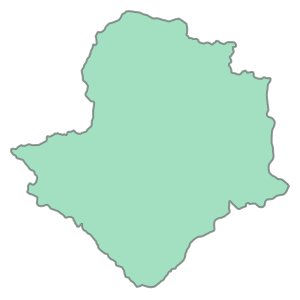

In [3]:
# Abrimos la primera subcuenca.
i = 0

Cuencas[i] = gpd.read_file(path + nombres_sub[i])

# A coordenadas UTM 14N (m).
Cuencas[i] = Cuencas[i].to_crs(32614)

# Columnas.
print(Cuencas[i].columns)
# Datos.
print(Cuencas[i].loc[0])
# Forma de la cuenca.
Cuencas[i].loc[0, "geometry"]

Index(['ID', 'CVE_SUBCUE', 'CVE_RH', 'RH', 'CVE_CUE', 'CUENCA', 'CVE_SUBC',
       'SUBCUENCA', 'AREA_KM2', 'PERIMETRO', 'TIPO', 'DRENAJE1', 'DESCARGA1',
       'DRENAJE2', 'DESCARGA2', 'DRENAJE3', 'DESCARGA3', 'DRENAJE4',
       'DESCARGA4', 'TOT_DESC', 'geometry'],
      dtype='object')
ID                                                        155.0
CVE_SUBCUE                                               RH19Be
CVE_RH                                                     RH19
RH                                                 COSTA GRANDE
CVE_CUE                                                       B
CUENCA                                    R. COYUQUILLA Y OTROS
CVE_SUBC                                                      e
SUBCUENCA                                           R. Petatlán
AREA_KM2                                                 548.64
PERIMETRO                                                142.88
TIPO                                                    ABIERTA
DRENAJ

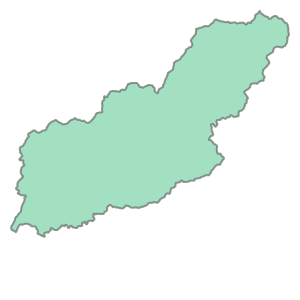

In [4]:
# Abrimos la segunda subcuenca.
i = 1

Cuencas[i] = gpd.read_file(path + nombres_sub[i])

# A coordenadas UTM 14N (m).
Cuencas[i] = Cuencas[i].to_crs(32614)

# Columnas.
print(Cuencas[i].columns)
# Datos.
print(Cuencas[i].loc[0])
# Forma de la cuenca.
Cuencas[i].loc[0, "geometry"]

In [5]:
# Coeficiente de compacidad de Gravelius.

# El primer corchete escoge el primer elemento
# de la lista Cuencas, que es el geoDataFrame
# de la subcuenca R. Gavia. El segundo corchete 
# crea la columna Gravelius dentro del GeoDataFrame.
# Si una operación está dentro de un paréntesis, la
# podemos escribir a lo largo de varias filas.
# Dentro de dobles comillas, hay que poner comillas sencillas.
for i in range( len(Cuencas) ):
    Cuencas[i]["GRAVELIUS"] = ( Cuencas[i]["PERIMETRO"] /
        ( 2 * np.sqrt( np.pi * Cuencas[i]["AREA_KM2"] ) ) )
    
    print( "Gravelius subcuenca "
        + f"{Cuencas[i].loc[0, 'SUBCUENCA']}: "
        + f"{Cuencas[i].loc[0, 'GRAVELIUS']}" )

Gravelius subcuenca R. Gavia: 1.4048222187279467
Gravelius subcuenca R. Petatlán: 1.7207698007667973


In [6]:
# Curvas de nivel.

# Cargamos los valores.
for i in range( len( Curvas ) ):
    Curvas[i] = gpd.read_file(path + nombres_c[i])
    # A coordenadas UTM 14N (m).
    Curvas[i] = Curvas[i].to_crs(4487)
    # Las curvas son un recorte de unas más largas.
    # La longitud no es real y hay que recalcularla.
    Curvas[i]["LENGTH"] = Curvas[i].length / 1000

# Ordenamos por cota para verificar Δz.
# El argumento de head es la cantidad de filas a poner.
Curvas[0].sort_values("CONTOUR").head(10)

,LENGTH,COV_,COV_ID,CONTOUR,geometry
25,1.105424,46665,36082,2601,"LINESTRING (403677.484 2148610.800, 403843.468..."
23,23.002555,46663,36082,2601,"LINESTRING (414391.457 2143828.118, 414084.316..."
22,22.344139,46662,36082,2601,"LINESTRING (420648.757 2142560.713, 420655.396..."
21,10.198715,46661,36082,2601,"LINESTRING (424125.326 2147511.429, 423470.404..."
6,0.232460,44387,34472,2601,"LINESTRING (402731.843 2149869.368, 402733.410..."
24,22.760554,46664,36082,2601,"LINESTRING (407824.398 2146503.268, 407570.879..."
11,18.948529,44925,34777,2601,"LINESTRING (405626.544 2152181.086, 405655.078..."
10,5.169659,44924,34777,2601,"LINESTRING (402338.781 2151752.952, 402469.232..."
20,14.464300,46549,36032,2801,"LINESTRING (406044.346 2138131.043, 405972.371..."
19,14.864803,46548,36032,2801,"LINESTRING (415912.355 2133639.341, 415966.243..."


In [7]:
# Pendiente de la cuenca de Alvard.

# Desnivel entre curvas [km]
D = 0.2

for i in range( len( Cuencas ) ):
    Cuencas[i]["ALVARD"] = ( D * Curvas[i]["LENGTH"].sum()
        / Cuencas[i]["AREA_KM2"] )
    
    # Pendiente en m/km.
    print( "Alvard subcuenca "
        + f"{Cuencas[i].loc[0, 'SUBCUENCA']}: "
        + f"{Cuencas[i].loc[0, 'ALVARD'] * 1000}" )

Alvard subcuenca R. Gavia: 69.81851468863245
Alvard subcuenca R. Petatlán: 243.80207491186428


In [8]:
# Cargamos la información del Río San Fernando.

for i in range( len(Rios) ):
    Rios[i] = gpd.read_file(path + nombres_r[i])
    # Mexico ITRF92 UTM 14N.
    Rios[i] = Rios[i].to_crs(4487)

# Vector del río.
print( Rios[0] )
print()
# Nube de puntos con información de cotas.
print( Rios[1].head() )

   FNODE_  TNODE_  LPOLY_  RPOLY_   LENGTH  COV_  COV_ID          NOMBRES  \
0    2606    2607       0       0  0.59233  1787    1967        R. Potosi   
1    2605    2608       0       0  0.93024  1788    1967       R. Conchos   
2    2600    2601       0       0  1.15536  1794    1962  R. San Fernando   

                                            geometry  
0  LINESTRING (466696.307 2758737.615, 462081.066...  
1  LINESTRING (543202.323 2777371.938, 543561.925...  
2  LINESTRING (631716.879 2760990.414, 631083.156...  

   FNODE_  TNODE_  LPOLY_  RPOLY_   LENGTH  COV_  COV_ID     NOMBRES  \
0    2605    2608       0       0  0.93024  1788    1967  R. Conchos   
1    2605    2608       0       0  0.93024  1788    1967  R. Conchos   
2    2605    2608       0       0  0.93024  1788    1967  R. Conchos   
3    2605    2608       0       0  0.93024  1788    1967  R. Conchos   
4    2605    2608       0       0  0.93024  1788    1967  R. Conchos   

   distance       angle     xcoord   

In [9]:
# Despalazamos las coordenadas un lugar.
gs = Rios[1]["geometry"].shift(1)
# Calculamos la distancia entre dos puntos adyacentes.
Rios[1]["Distancia"] = Rios[1]["geometry"].distance(gs)
# La posición del primer punto es 0, para los demás es una suma acumulada.
Rios[1].loc[0, "Distancia"] = 0
Rios[1]["x"] = Rios[1]["Distancia"].cumsum()

# Guardamos la distancia y la cota en otras variables.
x = Rios[1]["x"]
z = Rios[1]["zcoord"]

# Escogemos los valores iniciales y finales.
x_i = x.to_numpy()[0]
x_f = x.to_numpy()[-1]
z_f = z.to_numpy()[-1]
z_i = z.to_numpy()[0]

Rios[1]

,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,COV_,COV_ID,NOMBRES,distance,angle,xcoord,ycoord,zcoord,Distancia,x,geometry
0,2605,2608,0,0,0.93024,1788,1967,R. Conchos,0.93,246.784079,-99.328513,24.944138,233.0,0.000000,0.000000,POINT (466834.720 2758802.322)
1,2605,2608,0,0,0.93024,1788,1967,R. Conchos,0.92,267.382556,-99.319082,24.947030,225.0,1004.528814,1004.528814,POINT (467787.592 2759120.305)
2,2605,2608,0,0,0.93024,1788,1967,R. Conchos,0.91,267.382556,-99.309093,24.947487,222.0,1009.753687,2014.282501,POINT (468796.193 2759168.540)
3,2605,2608,0,0,0.93024,1788,1967,R. Conchos,0.90,267.382556,-99.299103,24.947943,219.0,1009.749188,3024.031689,POINT (469804.786 2759216.849)
4,2605,2608,0,0,0.93024,1788,1967,R. Conchos,0.89,267.382556,-99.289114,24.948400,225.0,1009.744714,4033.776403,POINT (470813.370 2759265.232)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2600,2601,0,0,1.15536,1794,1962,R. San Fernando,0.04,252.988083,-97.727834,24.940236,-8.0,1018.530522,211847.408317,POINT (628442.764 2758931.559)
206,2600,2601,0,0,1.15536,1794,1962,R. San Fernando,0.03,254.948968,-97.718223,24.942993,8.0,1017.389383,212864.797699,POINT (629410.356 2759245.959)
207,2600,2601,0,0,1.15536,1794,1962,R. San Fernando,0.02,254.948968,-97.708566,24.945590,10.0,1016.648970,213881.446669,POINT (630382.710 2759542.779)
208,2600,2601,0,0,1.15536,1794,1962,R. San Fernando,0.01,209.974830,-97.700212,24.949882,9.0,968.269174,214849.715843,POINT (631221.644 2760026.240)


In [10]:
# Recta de compensación.
def rect_comps(z_r):
    z = (z_f - z_r ) / (x_f - x_i) * (x - x_f) + z_f
    return z

# Integral de áreas compensadas.
def area_comps(z_r):
    a = rect_comps(z_r)
    I = integrate.simpson(z - a)
    return I
    

Pendiente [m/km]: [0.66735957]


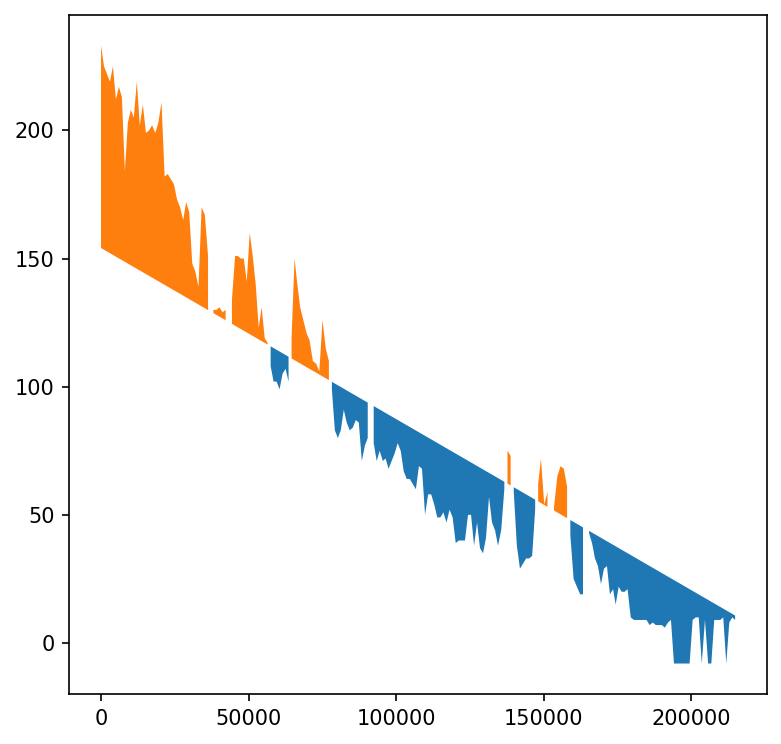

In [11]:
# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Graficamos el perfil del río.
#ax.plot(x, z)

# Encontramos la cota z_r que compensa las áreas.
# Primer intento: z_i
z_r = optimize.fsolve(area_comps, x0 = z_i)

# Graficamos la recta compensada.
z_2 = rect_comps(z_r)
#ax.plot(x, z_2)

# Dibujamos las áreas compensadas.
ax.fill_between( x, z, z_2, where = z < z_2 )
ax.fill_between( x, z, z_2, where = z > z_2 )

# Pendiente.
S = (z_r - z_f ) / (x_f - x_i)
print(f"Pendiente [m/km]: {S * 1000}")

In [12]:
# Tarea:
# 1. calcular la pendiente para el río Sonora por
# desnivel medio y por áreas compensadas y comparar.
# Utilizar UTM 12N (m) EPSG:4485 (https://epsg.io/4485)
# 2. Para la subcuenca R. Petatlán calcula la densidad
# de corrientes y la densidad de drenaje.

In [13]:
'''
# Ajustes shapefile río San Fernando.

Rios[1]["zcoord"] = np.nansum( [ Rios[1]["SAMPLE_1"],
    Rios[1]["SAMPLE_1_2"] ], axis = 0 )
Rios[1].drop(["SAMPLE_1", "SAMPLE_1_2"], axis = 1, inplace = True)

s_fer   = Rios[1][Rios[1]["NOMBRES"] == "R. San Fernando"].sort_values(
    "distance", ascending = False)
conchos = Rios[1][Rios[1]["NOMBRES"] == "R. Conchos"].sort_values(
    "distance", ascending = False)
potosi  = Rios[1][Rios[1]["NOMBRES"] == "R. Potosi"].sort_values(
    "distance", ascending = False)

Rios[1] = pd.concat( [conchos, s_fer], axis = 0 )
Rios[1].reset_index(drop = True, inplace = True)

Rios[1].to_file(path + "Coords Río San Fernando.shp")
'''

'\n# Ajustes shapefile río San Fernando.\n\nRios[1]["zcoord"] = np.nansum( [ Rios[1]["SAMPLE_1"],\n    Rios[1]["SAMPLE_1_2"] ], axis = 0 )\nRios[1].drop(["SAMPLE_1", "SAMPLE_1_2"], axis = 1, inplace = True)\n\ns_fer   = Rios[1][Rios[1]["NOMBRES"] == "R. San Fernando"].sort_values(\n    "distance", ascending = False)\nconchos = Rios[1][Rios[1]["NOMBRES"] == "R. Conchos"].sort_values(\n    "distance", ascending = False)\npotosi  = Rios[1][Rios[1]["NOMBRES"] == "R. Potosi"].sort_values(\n    "distance", ascending = False)\n\nRios[1] = pd.concat( [conchos, s_fer], axis = 0 )\nRios[1].reset_index(drop = True, inplace = True)\n\nRios[1].to_file(path + "Coords Río San Fernando.shp")\n'

In [14]:
'''
# Ajustes Shapefile Río Sonora.

u = Rios[1]["FNODE_"].unique()
u = [391, 397, 0, 426]
t = [None] * len(u)

for i in range(len(u)):
    t[i] = Rios[1][Rios[1]["FNODE_"] == u[i]
        ].sort_values( "distance", ascending = True)

Rios[1] = pd.concat( t[::-1], axis = 0 )
Rios[1].reset_index(drop = True, inplace = True)
Rios[1].rename({"SAMPLE_1": "zcoord"}, axis = 1, inplace = True)
Rios[1].to_file(path + "Coords Río Sonora.shp")
'''

'\n# Ajustes Shapefile Río Sonora.\n\nu = Rios[1]["FNODE_"].unique()\nu = [391, 397, 0, 426]\nt = [None] * len(u)\n\nfor i in range(len(u)):\n    t[i] = Rios[1][Rios[1]["FNODE_"] == u[i]\n        ].sort_values( "distance", ascending = True)\n\nRios[1] = pd.concat( t[::-1], axis = 0 )\nRios[1].reset_index(drop = True, inplace = True)\nRios[1].rename({"SAMPLE_1": "zcoord"}, axis = 1, inplace = True)\nRios[1].to_file(path + "Coords Río Sonora.shp")\n'